In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/cybersecurity_attacks_preprocessed_for_ML')

In [3]:
df5 = pd.read_csv('/content/drive/MyDrive/Datasets/cybersecurity_attacks_preprocessed_for_ML')

In [4]:
df.head()

,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,Network Segment,Firewall Logs,IDS/IPS Alerts,Log Source
0,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Ignored,Low,Segment C,Log Data,Alert Data,Firewall
1,ICMP,1022,Data,DNS,Amet libero optio quidem praesentium libero. E...,IoC Detected,54.05,Alert Triggered,Intrusion,Known Pattern A,Logged,High,Segment A,Log Data,Alert Data,Firewall
2,TCP,554,Control,DNS,Voluptate mollitia cupiditate necessitatibus n...,IoC Detected,97.82,Alert Triggered,Malware,Known Pattern B,Blocked,High,Segment A,Log Data,Alert Data,Firewall
3,ICMP,1178,Data,HTTP,Eaque deserunt nemo ad voluptate. Aliquid rem ...,IoC Detected,5.39,Alert Triggered,Malware,Known Pattern B,Ignored,High,Segment C,Log Data,Alert Data,Server
4,ICMP,765,Control,DNS,Dolores vitae neque velit maiores.\nReprehende...,IoC Detected,47.31,Alert Triggered,Intrusion,Known Pattern A,Blocked,Low,Segment C,Log Data,Alert Data,Server


In [31]:
df.isnull().sum()

Protocol              0
Packet Length         0
Packet Type           0
Traffic Type          0
Malware Indicators    0
Anomaly Scores        0
Alerts/Warnings       0
Attack Type           0
Attack Signature      0
Action Taken          0
Severity Level        0
Network Segment       0
Firewall Logs         0
IDS/IPS Alerts        0
Log Source            0
dtype: int64

In [5]:
df = df.drop(['Payload Data'] , axis = 1)

In [6]:
categorical_values = df.select_dtypes(include = ['object' , 'bool']).columns
numerical_values = df.select_dtypes(include = ['float' , 'int']).columns

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical_values :
  df[i] = le.fit_transform(df[i])

In [8]:
df['Packet Length'] = df['Packet Length'].astype(int)
df.head()

,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,Network Segment,Firewall Logs,IDS/IPS Alerts,Log Source
0,2,306,0,2,0,87.42,0,0,1,1,1,2,0,0,0
1,0,1022,1,0,0,54.05,0,1,0,2,0,0,0,0,0
2,1,554,0,0,0,97.82,0,2,1,0,0,0,0,0,0
3,0,1178,1,2,0,5.39,0,2,1,1,0,2,0,0,1
4,0,765,0,0,0,47.31,0,1,0,0,1,2,0,0,1


In [9]:
from sklearn.preprocessing import OneHotEncoder
#One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore' , dtype = int)
encoded_data = pd.DataFrame(encoder.fit_transform(df[categorical_values]).toarray())
encoded_data.columns = encoder.get_feature_names_out(categorical_values)

# Combine one-hot encoded data with numerical features
encoded_data = pd.concat([encoded_data, df[numerical_values]], axis=1)


In [10]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
df[numerical_values] = mm.fit_transform(df[numerical_values])

In [27]:
df.head(100)

,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,Network Segment,Firewall Logs,IDS/IPS Alerts,Log Source
0,2,0.168524,0,2,0,0.874337,0,0,1,1,1,2,0,0,0
1,0,0.667131,1,0,0,0.540470,0,1,0,2,0,0,0,0,0
2,1,0.341226,0,0,0,0.978389,0,2,1,0,0,0,0,0,0
3,0,0.775766,1,2,0,0.053627,0,2,1,1,0,2,0,0,1
4,0,0.488162,0,0,0,0.473037,0,1,0,0,1,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0.401811,1,0,0,0.123562,0,1,1,1,1,0,0,0,0
96,1,0.440808,1,1,0,0.527864,0,1,1,2,2,2,0,0,1
97,0,0.528552,0,1,0,0.026313,0,1,0,0,0,2,0,0,0
98,0,0.194290,1,1,0,0.375288,0,2,1,1,0,2,0,0,0


In [12]:
x = encoded_data.iloc[: , :].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1 , 11) :
  km = KMeans(n_clusters = i , n_init=20)
  km.fit_predict(x)
  wcss.append(km.inertia_)



In [13]:
wcss

[218733571.32026365,
 53111822.133123025,
 24368803.606886424,
 14209490.93115227,
 9486000.81515577,
 6835947.14188199,
 5382386.135932786,
 4260557.994683934,
 3533110.668525474,
 3099083.3435973045]

In [14]:
#for i, wcss in zip(range(1 , 11) , wcss):
    #print(f"Number of Clusters: {k}, WCSS: {wcss}")

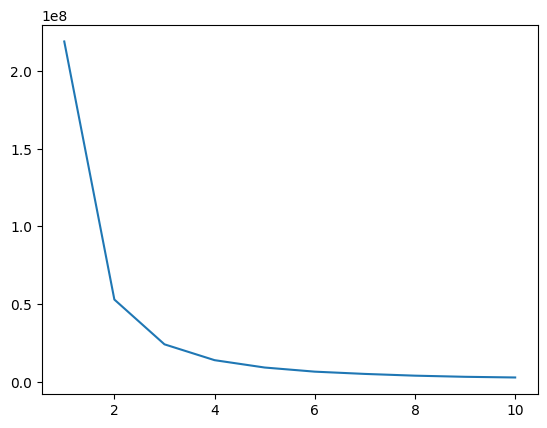

In [16]:
plt.plot(range(1 , 11) , wcss)

In [17]:
wcsss = []
for i in range(1 , 11) :
  kmm = KMeans(n_clusters = i , n_init=20)
  kmm.fit_predict(df)
  wcsss.append(kmm.inertia_)

In [18]:
wcsss

[6086.7857776793535,
 5416.664939399981,
 4994.303141113331,
 4677.423567487278,
 4438.179349757833,
 4236.511231533526,
 4051.9668264077695,
 3909.7969042561103,
 3786.0060714711803,
 3677.2299916099337]

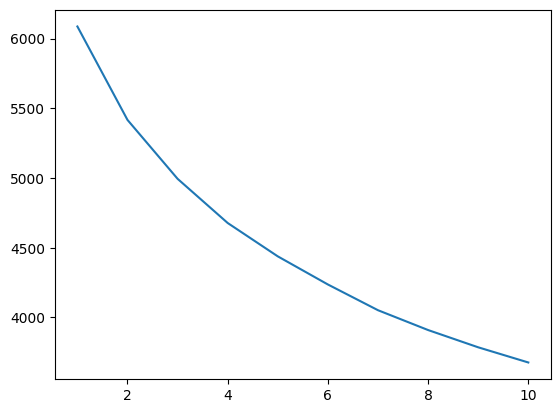

In [19]:
plt.plot(range(1 , 11) ,wcsss)

In [20]:
km_final = KMeans(n_clusters = 2)
y_means = km_final.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
df5['clusters_labels'] = y_means

In [26]:
df5.head(100)

,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,Network Segment,Firewall Logs,IDS/IPS Alerts,Log Source,clusters_labels
0,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Ignored,Low,Segment C,Log Data,Alert Data,Firewall,0
1,ICMP,1022,Data,DNS,Amet libero optio quidem praesentium libero. E...,IoC Detected,54.05,Alert Triggered,Intrusion,Known Pattern A,Logged,High,Segment A,Log Data,Alert Data,Firewall,1
2,TCP,554,Control,DNS,Voluptate mollitia cupiditate necessitatibus n...,IoC Detected,97.82,Alert Triggered,Malware,Known Pattern B,Blocked,High,Segment A,Log Data,Alert Data,Firewall,0
3,ICMP,1178,Data,HTTP,Eaque deserunt nemo ad voluptate. Aliquid rem ...,IoC Detected,5.39,Alert Triggered,Malware,Known Pattern B,Ignored,High,Segment C,Log Data,Alert Data,Server,1
4,ICMP,765,Control,DNS,Dolores vitae neque velit maiores.\nReprehende...,IoC Detected,47.31,Alert Triggered,Intrusion,Known Pattern A,Blocked,Low,Segment C,Log Data,Alert Data,Server,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,TCP,641,Data,DNS,Dolorem nam atque cumque vel.\nOfficiis aut ra...,IoC Detected,12.38,Alert Triggered,Intrusion,Known Pattern B,Ignored,Low,Segment A,Log Data,Alert Data,Firewall,0
96,TCP,697,Data,FTP,Quas assumenda provident tempora sint quis off...,IoC Detected,52.79,Alert Triggered,Intrusion,Known Pattern B,Logged,Medium,Segment C,Log Data,Alert Data,Server,0
97,ICMP,823,Control,FTP,Magni mollitia necessitatibus quisquam quae re...,IoC Detected,2.66,Alert Triggered,Intrusion,Known Pattern A,Blocked,High,Segment C,Log Data,Alert Data,Firewall,1
98,ICMP,343,Data,FTP,Fuga ducimus explicabo necessitatibus. Perspic...,IoC Detected,37.54,Alert Triggered,Malware,Known Pattern B,Ignored,High,Segment C,Log Data,Alert Data,Firewall,0


In [23]:
#df5.to_csv('/content/drive/MyDrive/Datasets/Anomaly detection/clustered dataset' , index = False)

In [24]:
print(x[y_means == 0].shape)
print(x[y_means == 1].shape)
print(x[y_means == 2].shape)
print(x[y_means == 3].shape)

(615, 30)
(622, 30)
(0, 30)
(0, 30)


In [25]:
clusters = km.cluster_centers_
clusters

array([[3.56589147e-01, 2.79069767e-01, 3.64341085e-01, 5.03875969e-01,
        4.96124031e-01, 3.17829457e-01, 3.10077519e-01, 3.72093023e-01,
        1.00000000e+00, 1.00000000e+00, 3.56589147e-01, 3.72093023e-01,
        2.71317829e-01, 4.88372093e-01, 5.11627907e-01, 3.79844961e-01,
        3.41085271e-01, 2.79069767e-01, 3.95348837e-01, 2.63565891e-01,
        3.41085271e-01, 2.09302326e-01, 4.03100775e-01, 3.87596899e-01,
        1.00000000e+00, 1.00000000e+00, 4.88372093e-01, 5.11627907e-01,
        8.10000000e+02, 5.52602326e+01],
       [3.86666667e-01, 2.86666667e-01, 3.26666667e-01, 5.53333333e-01,
        4.46666667e-01, 2.80000000e-01, 3.26666667e-01, 3.93333333e-01,
        1.00000000e+00, 1.00000000e+00, 3.00000000e-01, 3.26666667e-01,
        3.73333333e-01, 4.93333333e-01, 5.06666667e-01, 2.60000000e-01,
        4.13333333e-01, 3.26666667e-01, 3.26666667e-01, 3.20000000e-01,
        3.53333333e-01, 3.93333333e-01, 3.26666667e-01, 2.80000000e-01,
        1.00000000e+00,